In [1]:
import os
os.chdir(r"E:\kdg\Data 3\data3\data_aux")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import math

from scipy.stats import t
from scipy.stats import ttest_1samp
import statistics
from scipy.stats import chi2
from scipy.stats import chisquare

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'Unknown', 'unknown', 'UNKNOWN']

# O. REFRESH

In [12]:
t.ppf(0.975,49)
t.interval(confidence=0.95, df=50-1, loc=40, scale=10/math.sqrt(50))

(37.15803144877627, 42.84196855122373)

# 1. PUSHING ALPHA TO THE LIMIT


In [3]:
mu = 40
n = 50
x_bar = 43
s = 10

each time we increase capital P, to see where 43 fits in da interval

In [4]:
P = 0.9 #alpha is 10% reject
t.interval(confidence=P, df=n-1, loc=mu, scale=s/math.sqrt(n))

(37.62899899064614, 42.37100100935386)

In [5]:
P = 0.95 #alpha is 5% reject
t.interval(confidence=P, df=n-1, loc=mu, scale=s/math.sqrt(n))

(37.15803144877627, 42.84196855122373)

In [6]:
P = 0.99 #alpha is 1% accept
t.interval(confidence=P, df=n-1, loc=mu, scale=s/math.sqrt(n))

(36.20997557238172, 43.79002442761828)

factor = (observed-hypo mean) / (std/sqrt(sample size)

In [7]:
factor = (43-40) / (10/math.sqrt(50))
print(factor)

2.121320343559643


In [8]:
P = t.cdf(factor, 49) - t.cdf(-factor, 49) # since it is 50-1, hence why we see 49
print('P : ' + str(P))
print('alpha : ' + str(1-P))
#to see at which percent do we accept 43, exact value where rejection become acceptance

P : 0.9610219447556506
alpha : 0.038978055244349386


In [9]:
t.interval(confidence=0.961, df=50-1, loc=40, scale=10/math.sqrt(50))

(37.00035153132952, 42.99964846867048)

# One sample t-test


In [10]:
from scipy.stats import ttest_1samp  
#all can be summarized in one smaple t-test to see where the reject becomes accept, get ur p value, p value cant be smaller then the aplha value

screens = pd.read_csv('screens.csv',delimiter=';', decimal='.')
screens.info()
screens["New_size"].mean()
screens["New_size"].std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   New_size  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


10.0

In [13]:
mu=40
ttest_1samp(screens["New_size"],mu)
#does it all for us, gives us the factor(does it all for us) then give us stat, pval n df(50-1 of sample), pval from stat, dfactor from sample

TtestResult(statistic=2.1213203435596424, pvalue=0.03897805524434941, df=49)

# 4. CHI SQUARE TEST

In [14]:
measured_values = [15,3,7,5]
expected_values = [9,3,9,9]
dev = [a - b for a, b in zip(measured_values,expected_values)]
print(dev)
sq_dev = [e ** 2 for e in dev]
print(sq_dev)
ratios = [a/b for a, b in zip(sq_dev, expected_values)]
print(ratios)
chisqr = sum(ratios)
print(chisqr)

[6, 0, -2, -4]
[36, 0, 4, 16]
[4.0, 0.0, 0.4444444444444444, 1.7777777777777777]
6.222222222222222


In [15]:
from scipy.stats import chi2
chi2.ppf (0.95, df=4-1)

7.814727903251179

In [16]:
1-chi2.cdf(6.22, 4-1)

0.10138377011897626

In [17]:
alpha = 0.05
chi2.ppf ((1- alpha), df=4-1)

7.814727903251179

In [18]:
chi2.cdf (7.815, df=4-1) 

0.9500060970251161

In [19]:
1-chi2.cdf(6.2222,4-1)

0.10128618768387088

In [20]:
from scipy.stats import chisquare
measured_values = [15,3,7,5]
expected_values = [9,3,9,9]
chisquare(measured_values , expected_values)

Power_divergenceResult(statistic=6.222222222222222, pvalue=0.10128520246221875)

import chisqaure does it for u, no need to know da alpha for da calc, just need to know da alpha just to decide

# 6. QUESTIONNAIRE


Load data:

In [21]:
studenq = pd.read_csv('Questionnaire 21-22.csv', delimiter=';', decimal='.')
studenq.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Letter         39 non-null     object 
 1   Number Languages     39 non-null     float64
 2   Writing Hand         39 non-null     object 
 3   Shoe Size            39 non-null     float64
 4   Length               39 non-null     int64  
 5   Blood Type           39 non-null     object 
 6   Resus Factor         39 non-null     object 
 7   Siblings             39 non-null     int64  
 8   Internet Purchase    39 non-null     object 
 9   Mobile Devices       39 non-null     int64  
 10  Leisure              39 non-null     object 
 11  Hours Math           39 non-null     object 
 12  Importance AI Study  39 non-null     object 
 13  Antwerp Address      39 non-null     object 
 14  Travel Distance      39 non-null     float64
 15  Travel Time          39 non-null     int64

## Question 1

1.a. Continue with last time's exercise. Add a column to the data frame and place in it the length of a person expressed in his shoe size (i.e. length divided by shoe size)

In [22]:
studenq["Length in shoe size"] = studenq['Length'] / studenq['Shoe Size']

1.b. Someone claims that the ratio of length to shoe size of a person is 4.2 with a standard deviation of 0.05. Based on the data from the questionnaire, can you agree with this? And this from which level of significance (&alpha;)?


In [23]:
mu = 4.2
ttest_1samp(studenq["Length in shoe size"].dropna(axis=0), mu)
#calc da ttest, for sample std
#set alpha first before u cheat

TtestResult(statistic=-0.44656418681355114, pvalue=0.6577244031679756, df=38)

## Question 2

2.a. Determine the 99% confidence interval for the distance to KdG (first remove the outliers!

In [31]:
def no_outliers(data):
    print(type(data))
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low1 = Q1 - 1.5 * I
    high1 = Q3 + 1.5 * I
    print(low1)
    print(high1)
    return[data[data.between(low1, high1)]]

distance = no_outliers(studenq["Travel Distance"])
x_bar = distance.mean()
s = distance.std()
n = len(distance)
t.interval(confidence=0.99, df=n-1, loc=x_bar, scale=s/math.sqrt(n))
#2.66 between 11.6 da interval where true mean be

<class 'pandas.core.series.Series'>
-19.750000000000004
37.45
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "E:\kdg\Data 3\DAI3venv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\willi\AppData\Local\Temp\ipykernel_23320\1731044516.py", line 13, in <module>
    x_bar = distance.mean()
AttributeError: 'list' object has no attribute 'mean'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "E:\kdg\Data 3\DAI3venv\lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "E:\kdg\Data 3\DAI3venv\lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "E:\kdg\Data 3\DAI3venv\lib\site-packages\IPython\core\ultratb.py", line 1326, in structured_traceback
    return VerboseTB.structured_traceback(
  File "E:\kdg\Data 3\DAI3venv\lib\site-packages\IP

2.b. Someone claims that the distance to KdG is 7.5 km on average. From what leven of significance (&alpha;) can you not refute the claim?

## Question 3

3 The table below shows the distribution of the world population according to different blood groups. Can you refute this on the basis of the sample? Take &alpha; = 0.05.

O+ : 37.37% A+ : 27.24% B+ 22.83% AB+ 6.22% O- 2.69% A- 2.09% B- 1.16% AB- 0.4%

# GRAPHS STATISTICAL TESTING

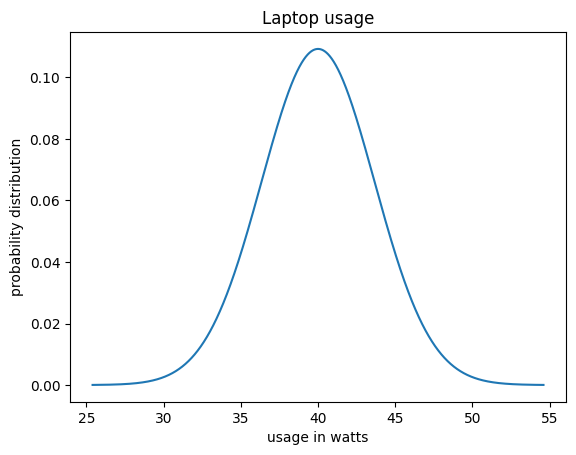

In [24]:
plt.figure()
x = np.arange(40-4*20/math.sqrt(30) , 40+4*20/math.sqrt(30) , 0.001)
p = stats.norm.pdf(x, 40.0, 20/math.sqrt(30))
plt.plot(x, p)
plt.xlabel('usage in watts')
plt.ylabel('probability distribution')
plt.title ('Laptop usage')
plt.show()

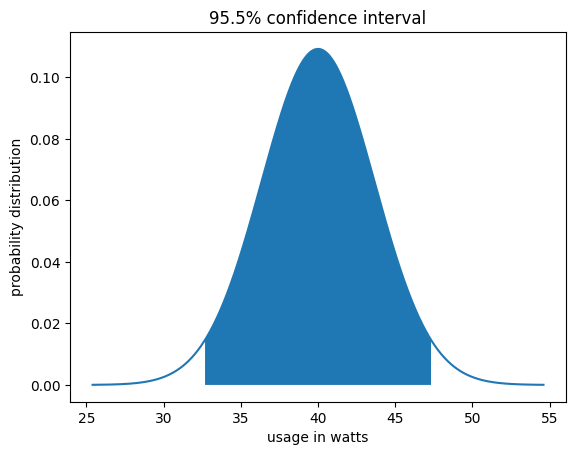

In [25]:
plt.figure()
x = np.arange(40-4*20/math.sqrt(30) , 40+4*20/math.sqrt(30) , 0.001)
p = stats.norm.pdf(x, 40.0, 20/math.sqrt(30))
plt.plot(x, p)
plt.fill_between(x,p, 0, where = ((x<=47.32) & (x>=32.68)))
plt.xlabel('usage in watts')
plt.ylabel('probability distribution')
plt.title ('95.5% confidence interval')
plt.show()

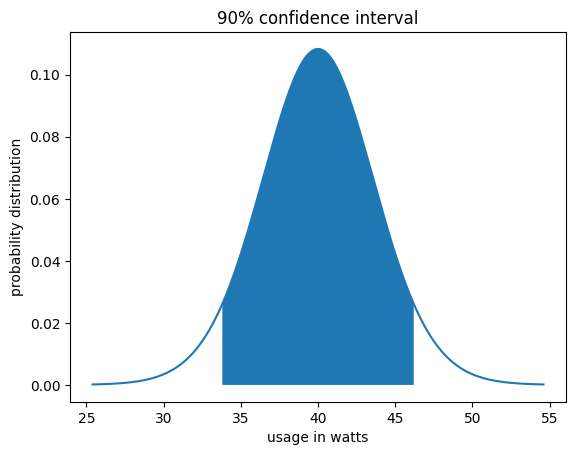

In [26]:
plt.figure()
x = np.arange(40-4*20/math.sqrt(30) , 40+4*20/math.sqrt(30) , 0.001)
p = t.pdf(x, df=30-1, loc=40, scale=20/math.sqrt(30))
plt.plot(x, p)
plt.fill_between(x,p, where = ((x<=46.2) & (x>=33.8)))
plt.xlabel('usage in watts')
plt.ylabel('probability distribution')
plt.title ('90% confidence interval')
plt.show()

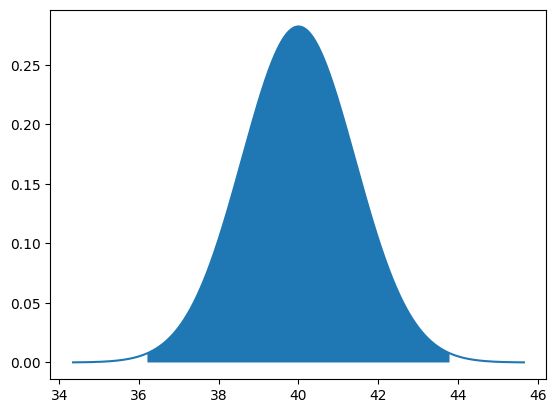

In [27]:
plt.figure()
n=50
s=10
mu = 40
alpha = 0.01
x = np.arange(mu-4*s/math.sqrt(n) , mu+4*s/math.sqrt(n) , 0.001)
p = stats.norm.pdf(x, mu, s/math.sqrt(n))
plt.plot(x, p)
low= mu - t.ppf(1-alpha/2,n-1) * s/math.sqrt(n)
high= mu + t.ppf(1-alpha/2,n-1) * s/math.sqrt(n)
plt.fill_between(x,p, where = ((x<=high) & (x>=low)))
plt.show()